Data Preprocessing
The main objective of preprocessing is:
1. checking data set for irrelavent columns which not serve our prediction of length of stay model and deal with it.
2. Handling Categorical Variables:
3. Correlation heatmap after encoding to chech if there are tow features highly correlated to each other & drop one of them.
4. Checking for duplication
5. saving ready encoded and scaled csv file for next modeling step. 

About Dataset:
This dataset is about inpatient discharged from hospitals of state of New York provided by the Dept of Health of New York state for the year of 2015.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,recall_score,precision_score
from imblearn.under_sampling import RandomUnderSampler
from datasist.structdata import detect_outliers
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import category_encoders as ce

In [2]:
# loading the dataset.
data = pd.read_csv('../data/processed/Infectious and Parasitic Diseases.csv')

In [3]:
# Geitting Information about the Data
data.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130885 entries, 0 to 130884
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   health_service_area                  130885 non-null  object 
 1   hospital_county                      130885 non-null  object 
 2   operating_certificate_number         130885 non-null  float64
 3   facility_id                          130885 non-null  float64
 4   facility_name                        130885 non-null  object 
 5   age_group                            130885 non-null  object 
 6   zip_code__3_digits                   130885 non-null  int64  
 7   gender                               130885 non-null  object 
 8   race                                 130885 non-null  object 
 9   ethnicity                            130885 non-null  object 
 10  length_of_stay                       130885 non-null  int64  
 11  type_of_admis

In [4]:
#checking for duplication in data 
data.duplicated().sum()

0

In [5]:
# veiwing the head of the data the first 5 rows
pd.set_option('display.max_columns', None)  # This will display all columns
data.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code__3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,birth_weight,emergency_department_indicator,total_charges,total_costs,over_120_stay
0,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,142,F,White,Not Span/Hispanic,3,Emergency,Home or Self Care,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Medicaid,0,Y,9675.18,5692.99,0
1,Central NY,Cayuga,501000.0,85.0,Auburn Memorial Hospital,70 or Older,131,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,246,Fever of unknown origin,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,Medicare,0,N,8172.25,1629.33,0
2,Central NY,Oneida,3202003.0,599.0,Faxton-St Lukes Healthcare St Lukes Division,0 to 17,135,M,White,Not Span/Hispanic,2,Emergency,Home or Self Care,224,Other perinatal conditions,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Medicaid,4200,Y,8974.68,5212.81,0
3,Central NY,Onondaga,3301007.0,635.0,University Hospital SUNY Health Science Center,0 to 17,132,M,White,Spanish/Hispanic,3,Emergency,Home or Self Care,246,Fever of unknown origin,4,DIAGNOSTIC SPINAL TAP,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Medicaid,0,Y,18265.20,6330.24,0
4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,134,M,White,Unknown,1,Urgent,Home or Self Care,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Medicaid,0,N,7183.71,1764.87,0


* From the above and by puting the aim of our model in mind we can noticed that:

Not all the feature will serve our aim as we try to make general model could predict patient length of stay regard less of the city or state also as total cost also stay over 120 and chrges comes at the end of stay they don't make sence to keep them. then the following columns not usefull for the aim of this model it is better to be droped: ('health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity','zip_code__3_digits', 'patient_disposition','payment_typology_1','total_charges','total_costs','over_120_stay')

In [6]:
# dropping unnecessary columns for the model from data frame
data.drop(['health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity','zip_code__3_digits','patient_disposition','payment_typology_1','birth_weight','total_charges','total_costs','over_120_stay'],axis=1, inplace=True)

In [7]:
#checking for duplication in data after feature encoded. 
data.duplicated().sum()

82141

In [8]:
# Drop duplicates and reset the index
data = data.drop_duplicates().reset_index(drop=True)

In [9]:
data.duplicated().sum()

0

In [10]:
# getting copy of the data set
df = data.copy()

In [11]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,0 to 17,F,3,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
1,70 or Older,M,1,Emergency,246,Fever of unknown origin,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,N
2,0 to 17,M,2,Emergency,224,Other perinatal conditions,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
3,0 to 17,M,3,Emergency,246,Fever of unknown origin,4,DIAGNOSTIC SPINAL TAP,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
4,0 to 17,M,1,Urgent,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,N


In [12]:
# checking features value counts.
for i in list(df.columns):
    print(i)
    print(df[i].value_counts())
    print("*"*100)

age_group
50 to 69       17360
70 or Older    17264
30 to 49        8143
18 to 29        3069
0 to 17         2908
Name: age_group, dtype: int64
****************************************************************************************************
gender
M    24953
F    23791
Name: gender, dtype: int64
****************************************************************************************************
length_of_stay
4      3996
3      3947
5      3632
2      3482
6      3258
       ... 
107       2
118       2
98        1
111       1
102       1
Name: length_of_stay, Length: 120, dtype: int64
****************************************************************************************************
type_of_admission
Emergency        42221
Urgent            4176
Elective          2222
Not Available       62
Trauma              54
Newborn              9
Name: type_of_admission, dtype: int64
****************************************************************************************************
ccs_di

In [13]:
# checking features n unique.
for i in list(df.columns):
    print(i)
    print(df[i].nunique())
    print("*"*100)

age_group
5
****************************************************************************************************
gender
2
****************************************************************************************************
length_of_stay
120
****************************************************************************************************
type_of_admission
6
****************************************************************************************************
ccs_diagnosis_code
47
****************************************************************************************************
ccs_diagnosis_description
47
****************************************************************************************************
ccs_procedure_code
209
****************************************************************************************************
ccs_procedure_description
209
****************************************************************************************************
apr_drg_code
12
************

### First encoding oridinal feature: 
By creating dictionary with ordinal number and maping the dictionary with the ordinal categorical feature

In [14]:
# age_group:
dict_age_group = {'0 to 17':1, '18 to 29':2, '30 to 49':3, '50 to 69':4, '70 or Older':5}
# maping age goup dictionary
df['age_group'] = df['age_group'].map(dict_age_group)

In [15]:
df['age_group'].unique()

array([1, 5, 3, 4, 2], dtype=int64)

In [16]:
# apr_severity_of_illness_description Already encoded by apr_severity_of_illness_code but we will made dictionery for it.
dict_apr_severity_of_illness_description = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df.apr_severity_of_illness_description = df.apr_severity_of_illness_description.map(dict_apr_severity_of_illness_description)
df.apr_severity_of_illness_description.unique()

array([1, 2, 3, 4], dtype=int64)

In [17]:
# then drop the apr_severity_of_illness_code as it is no longer needed
df.drop('apr_severity_of_illness_code',axis=1,inplace=True)

In [18]:
# apr_risk_of_mortality:
dict_apr_risk_of_mortality = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df["apr_risk_of_mortality"] = df["apr_risk_of_mortality"].map(dict_apr_risk_of_mortality)

In [19]:
df["apr_risk_of_mortality"].unique()

array([1, 2, 3, 4], dtype=int64)

### Second encoding nominal feature:
* For Features with high cardinality we are going to use Target Encoding (Mean Encoding) then dropping it:
  - (ccs_diagnosis_description: 263 unique, ccs_procedure_description: 232, apr_drg_description: 314, apr_mdc_description: 25 unique values)     


* For features with low cardinality we are going to use get dumies to encode it features like:

  - (gender: 2 unique, type_of_admission: 6, apr_medical_surgical_description: 2, emergency_department_indicator: 2) 

#### * First high cardinality categorical Features

In [20]:
# Target Encoding (Mean Encoding) for (ccs_diagnosis_description: 263 unique values:
dict_ccs_diagnosis_description=round(df.groupby('ccs_diagnosis_description')['length_of_stay'].mean()).to_dict()

In [21]:
dict_ccs_diagnosis_description

{'Acute and unspecified renal failure': 18.0,
 'Acute cerebrovascular disease': 10.0,
 'Anal and rectal conditions': 5.0,
 'Bacterial infection; unspecified site': 8.0,
 'Cancer; other and unspecified primary': 14.0,
 'Chronic kidney disease': 8.0,
 'Chronic ulcer of skin': 8.0,
 'Coagulation and hemorrhagic disorders': 12.0,
 'Complication of device; implant or graft': 11.0,
 'Complications of surgical procedures or medical care': 8.0,
 'Deficiency and other anemia': 6.0,
 'Diabetes mellitus with complications': 8.0,
 'E Codes: Unclassified': 4.0,
 'Encephalitis (except that caused by tuberculosis or sexually transmitted disease)': 11.0,
 'Epilepsy; convulsions': 14.0,
 'Fever of unknown origin': 4.0,
 'Fluid and electrolyte disorders': 5.0,
 'HIV infection': 6.0,
 'Hepatitis': 14.0,
 'Infective arthritis and osteomyelitis (except that caused by tuberculosis or sexually transmitted disease)': 8.0,
 'Influenza': 5.0,
 'Intestinal infection': 6.0,
 'Lymphadenitis': 6.0,
 'Medical examin

In [22]:
# encoding using maping dict_ccs_diagnosis_description
df['ccs_diagnosis_description'] = df['ccs_diagnosis_description'].map(dict_ccs_diagnosis_description)

In [23]:
# Target Encoding (Mean Encoding) for (ccs_procedure_description: 232 unique values):
dict_ccs_procedure_description=round(df.groupby('ccs_procedure_description')['length_of_stay'].mean()).to_dict()
dict_ccs_procedure_description

{'ABDOMINAL PARACENTESIS': 10.0,
 'ALCO/DRUG REHAB/DETOX': 10.0,
 'AMPUTATE LOWER EXTRMITY': 20.0,
 'AORTIC RESECTION; REPL': 6.0,
 'APPENDECTOMY': 10.0,
 'ARTERIAL BLOOD GASES': 6.0,
 'ARTERIO FEMORAL/LOW ART': 14.0,
 'ARTERIO/VENOGRAM-NOT HH': 7.0,
 'ARTERIOVENOUS FISTULA': 22.0,
 'ARTHROCENTESIS': 10.0,
 'ARTHROPLASTY KNEE': 13.0,
 'ARTHROPLASTY-NOT HIP/KN': 13.0,
 'ARTHROSCOPY': 15.0,
 'BIOPSY OF LIVER': 15.0,
 'BLOOD TRANSFUSION': 11.0,
 'BONE MARROW BIOPSY': 16.0,
 'BONE MARROW TRANSPLANT': 58.0,
 'BREAST BIOPSY & DX PRCS': 9.0,
 'CANCER CHEMOTHERAPY': 12.0,
 'CARDIAC PACEMAKER/DEFIB': 15.0,
 'CARDIAC STRESS TESTS': 7.0,
 'CEREBRAL ARTERIOGRAM': 4.0,
 'CHOLECYSTECTOMY/EXPLOR': 11.0,
 'CIRCUMCISION': 8.0,
 'COLONOSCOPY AND BIOPSY': 11.0,
 'COLORECTAL RESECTION': 19.0,
 'COLOSTOMY; TEMP/PERM': 22.0,
 'COMP AXIAL TOMOGR (CT)': 7.0,
 'CONTRAST AORTOGRAM': 13.0,
 'CONTROL OF EPISTAXIS': 11.0,
 'CONV OF CARDIAC RHYTHM': 9.0,
 'COR ARTERY BYP GRF-CABG': 23.0,
 'CT SCAN ABDOMEN': 6.0,
 '

In [24]:
# encoding using maping dict_ccs_diagnosis_description
df['ccs_procedure_description'] = df['ccs_procedure_description'].map(dict_ccs_procedure_description)

In [25]:
# Target Encoding (Mean Encoding) for (apr_drg_description: 314 unique values):
dict_apr_drg_description=round(df.groupby('apr_drg_description')['length_of_stay'].mean()).to_dict()
dict_apr_drg_description

{'Bone marrow transplant': 60.0,
 'Fever': 4.0,
 'Heart &/or lung transplant': 104.0,
 'Infectious & parasitic diseases including HIV w O.R. procedure': 17.0,
 'Liver transplant &/or intestinal transplant': 36.0,
 'Other infectious & parasitic diseases': 6.0,
 'Post-op, post-trauma, other device infections w O.R. procedure': 11.0,
 'Post-operative, post-traumatic, other device infections': 8.0,
 'Septicemia & disseminated infections': 11.0,
 'Tracheostomy w MV 96+ hours w extensive procedure or ECMO': 50.0,
 'Tracheostomy w MV 96+ hours w/o extensive procedure': 43.0,
 'Viral illness': 5.0}

In [26]:
# encoding using maping apr_drg_description
df['apr_drg_description'] = df['apr_drg_description'].map(dict_apr_drg_description)

In [27]:
# dropping the folloing columns ['ccs_diagnosis_code','ccs_procedure_code','apr_drg_code','apr_mdc_code','apr_mdc_description']
df.drop(['ccs_diagnosis_code','ccs_procedure_code','apr_drg_code','apr_mdc_code','apr_mdc_description'],axis=1,inplace=True)

In [28]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,1,F,3,Emergency,5.0,6.0,5.0,1,1,Medical,Y
1,5,M,1,Emergency,4.0,6.0,4.0,2,2,Medical,N
2,1,M,2,Emergency,5.0,6.0,4.0,1,1,Medical,Y
3,1,M,3,Emergency,4.0,8.0,4.0,1,1,Medical,Y
4,1,M,1,Urgent,5.0,6.0,5.0,1,1,Medical,N


#### * Second low cardinality categorical Features:
For features with low cardinality we are going to use get dumies to encode it features like:

  - (gender: 2 unique values, type_of_admission: 6, apr_medical_surgical_description: 2, emergency_department_indicator: 2)

In [29]:
# Making list for low cardinality features to help in preparing dict after encoded it.
gender_list = df.gender.unique().tolist()
type_of_admission_list = df.type_of_admission.unique().tolist()
apr_medical_surgical_description_list = df.apr_medical_surgical_description.unique().tolist()
emergency_department_indicator_list = df.emergency_department_indicator.unique().tolist()

In [30]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,1,F,3,Emergency,5.0,6.0,5.0,1,1,Medical,Y
1,5,M,1,Emergency,4.0,6.0,4.0,2,2,Medical,N
2,1,M,2,Emergency,5.0,6.0,4.0,1,1,Medical,Y
3,1,M,3,Emergency,4.0,8.0,4.0,1,1,Medical,Y
4,1,M,1,Urgent,5.0,6.0,5.0,1,1,Medical,N


In [31]:
df = pd.get_dummies(df,drop_first=True)

In [32]:
df.head()

,age_group,length_of_stay,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_severity_of_illness_description,apr_risk_of_mortality,gender_M,type_of_admission_Emergency,type_of_admission_Newborn,type_of_admission_Not Available,type_of_admission_Trauma,type_of_admission_Urgent,apr_medical_surgical_description_Surgical,emergency_department_indicator_Y
0,1,3,5.0,6.0,5.0,1,1,0,1,0,0,0,0,0,1
1,5,1,4.0,6.0,4.0,2,2,1,1,0,0,0,0,0,0
2,1,2,5.0,6.0,4.0,1,1,1,1,0,0,0,0,0,1
3,1,3,4.0,8.0,4.0,1,1,1,1,0,0,0,0,0,1
4,1,1,5.0,6.0,5.0,1,1,1,0,0,0,0,1,0,0


In [33]:
dict_gender = {'F':0,'M':1}
dict_type_of_admission = {'Emergency':[1,0,0,0,0], 'Urgent':[0,0,0,0,1], 'Elective':[0,0,0,0,0], 'Not Available':[0,0,1,0,0], 'Trauma':[0,0,0,1,0], 'Newborn':[0,1,0,0,0]}
dict_apr_medical_surgical_description_list = {'Medical':0, 'Surgical':1}
dict_emergency_department_indicator_list = {'Y':1, 'N':0}

In [34]:
# I am interested in take a look at correlation matrics after features encoded:
corr_mat = round(df.corr()['length_of_stay'].sort_values(ascending=False),2)
corr_mat

length_of_stay                               1.00
apr_drg_description                          0.47
ccs_procedure_description                    0.42
apr_severity_of_illness_description          0.41
apr_risk_of_mortality                        0.38
apr_medical_surgical_description_Surgical    0.28
ccs_diagnosis_description                    0.23
age_group                                    0.12
emergency_department_indicator_Y             0.05
type_of_admission_Emergency                  0.05
gender_M                                     0.02
type_of_admission_Newborn                    0.00
type_of_admission_Trauma                    -0.01
type_of_admission_Urgent                    -0.01
type_of_admission_Not Available             -0.01
Name: length_of_stay, dtype: float64

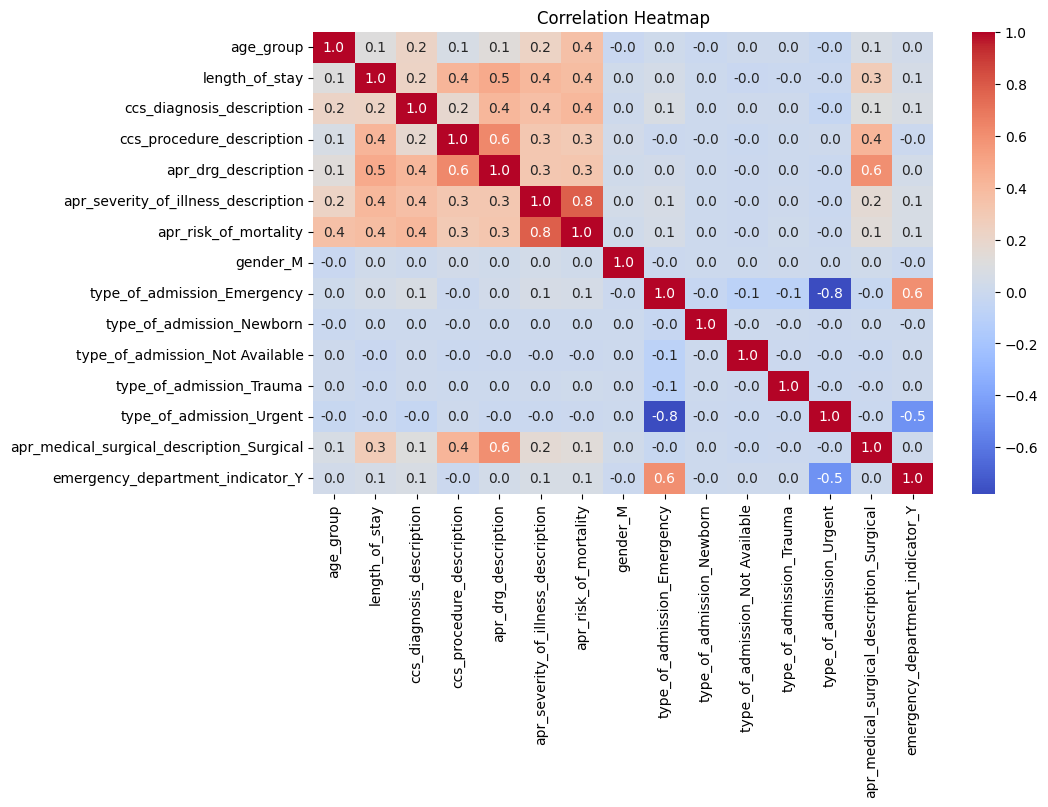

In [35]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

* apr_severity_of_illness_description & apr_risk_of_mortality corr = 0.8 we are going to drop apr_risk_of_mortality.

* ccs_procedure_description positive correlanialty = 0.6 with apr_drg_description we will drop apr_drg_description 

* type_of_admission_Emergency corr = -0.8, 0.6 with type_of_admission_Urgent, emergency_department_indicator_Y respectivly we going to drop both of them.


In [36]:
# dropping highly correlated feature ['birth_weight','emergency_department_indicator_Y','apr_risk_of_mortality']
df.drop(['apr_risk_of_mortality','apr_drg_description','emergency_department_indicator_Y','type_of_admission_Urgent'],axis=1,inplace=True)

In [37]:
#checking for duplication in data after feature encoded. 
df.duplicated().sum()

24449

In [38]:
# Drop duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

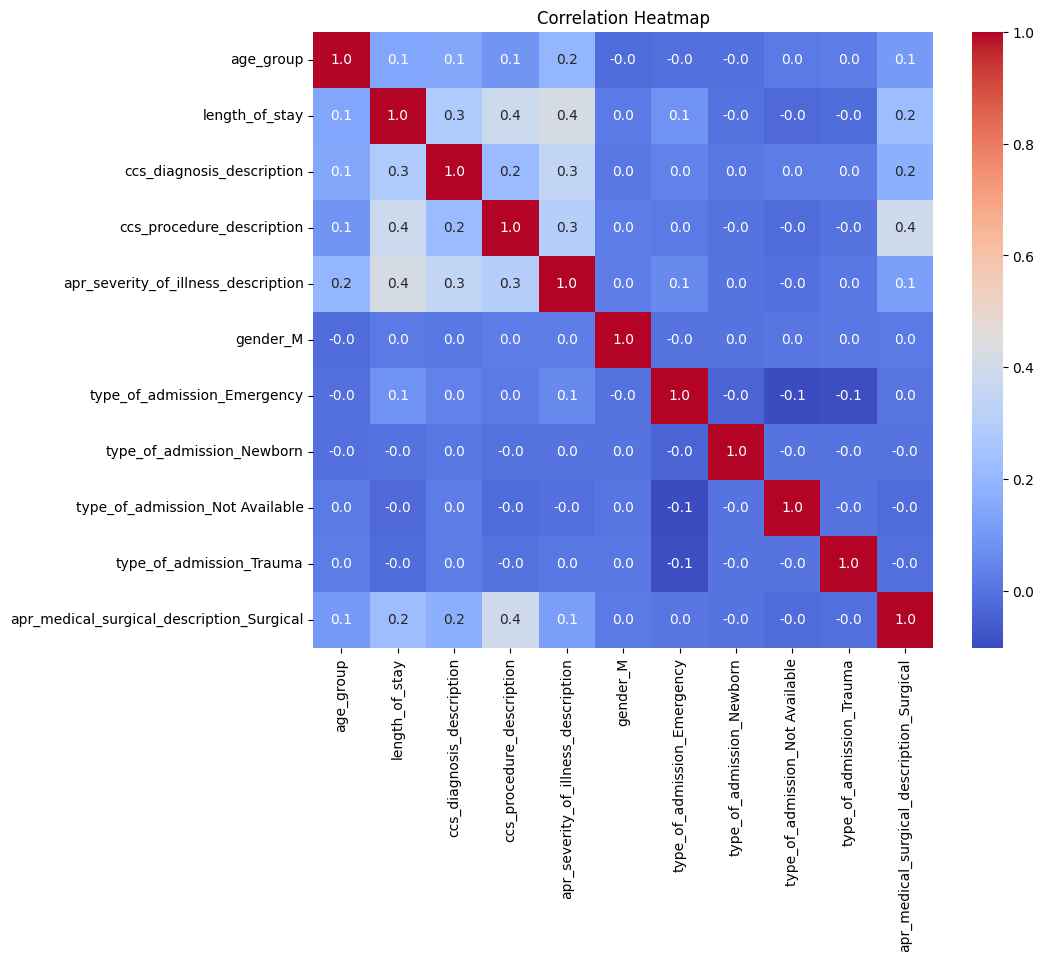

In [39]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df.describe()

,age_group,length_of_stay,ccs_diagnosis_description,ccs_procedure_description,apr_severity_of_illness_description,gender_M,type_of_admission_Emergency,type_of_admission_Newborn,type_of_admission_Not Available,type_of_admission_Trauma,apr_medical_surgical_description_Surgical
count,24295.000000,24295.000000,24295.000000,24295.000000,24295.000000,24295.000000,24295.000000,24295.000000,24295.000000,24295.000000,24295.000000
mean,3.703519,14.973534,11.449681,12.875448,2.968430,0.513151,0.803375,0.000370,0.002511,0.002182,0.361762
std,1.205989,17.048630,3.498487,6.599527,0.980101,0.499837,0.397454,0.019244,0.050046,0.046657,0.480520
min,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,8.000000,9.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,9.000000,14.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,19.000000,14.000000,15.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,120.000000,26.000000,58.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df.length_of_stay.unique()

array([  3,   1,   2,   4,   5,  10,   7,   6,  14,  15,  22,  21,   8,
        12,  38,  17,   9,  13,  16,  19,  30,  11,  20,  47,  53,  62,
        29,  31,  33,  18,  24, 120,  26,  32,  23,  27,  74,  42,  87,
        41,  35,  54,  44,  28,  45,  50,  56,  39,  81,  93,  36,  34,
        51,  46,  40, 115,  55,  61,  59,  43,  92,  25,  37,  52,  76,
        73,  97,  48,  75,  66,  58, 113,  69,  49,  64,  67,  84,  57,
        78,  89,  65,  94,  63,  72,  68,  90,  86,  95,  99, 103, 104,
        60, 119, 100,  88,  82, 106,  96,  79,  98, 110,  83,  71,  80,
        70, 116,  91, 108,  77, 117, 105,  85, 112, 114, 101, 109, 111,
       107, 118, 102], dtype=int64)

In [42]:
outlier = df.length_of_stay > 30

In [43]:
df['length_of_stay'] = np.where(outlier, np.nan, df['length_of_stay'])

In [44]:
df = df.dropna()

In [45]:
df.length_of_stay.value_counts()

4.0     1674
3.0     1667
5.0     1503
2.0     1501
6.0     1393
7.0     1315
1.0     1192
8.0     1169
9.0     1015
10.0     912
11.0     822
12.0     730
14.0     662
13.0     655
15.0     582
16.0     516
17.0     466
18.0     412
20.0     377
19.0     369
21.0     353
22.0     296
23.0     275
24.0     251
25.0     227
26.0     225
27.0     211
28.0     193
29.0     182
30.0     178
Name: length_of_stay, dtype: int64

In [46]:
df.describe()

,age_group,length_of_stay,ccs_diagnosis_description,ccs_procedure_description,apr_severity_of_illness_description,gender_M,type_of_admission_Emergency,type_of_admission_Newborn,type_of_admission_Not Available,type_of_admission_Trauma,apr_medical_surgical_description_Surgical
count,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000,21323.000000
mean,3.662336,9.874502,11.181447,12.085541,2.853914,0.510529,0.793369,0.000375,0.002861,0.002486,0.330535
std,1.225507,7.285880,3.574059,5.207359,0.978379,0.499901,0.404898,0.019366,0.053411,0.049795,0.470417
min,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,8.000000,8.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,8.000000,14.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,14.000000,14.000000,15.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,30.000000,26.000000,58.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21323 entries, 0 to 24294
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age_group                                  21323 non-null  int64  
 1   length_of_stay                             21323 non-null  float64
 2   ccs_diagnosis_description                  21323 non-null  float64
 3   ccs_procedure_description                  21323 non-null  float64
 4   apr_severity_of_illness_description        21323 non-null  int64  
 5   gender_M                                   21323 non-null  uint8  
 6   type_of_admission_Emergency                21323 non-null  uint8  
 7   type_of_admission_Newborn                  21323 non-null  uint8  
 8   type_of_admission_Not Available            21323 non-null  uint8  
 9   type_of_admission_Trauma                   21323 non-null  uint8  
 10  apr_medical_surgical_d

In [48]:
x = df.drop('length_of_stay',axis=1)
y = df.length_of_stay

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
# trying different models to compare between them
models = {"Liner Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(n_neighbors=7),
          "RF": RandomForestRegressor(n_estimators=100, n_jobs=-1)}

In [52]:
for name,model in models.items():
    print("----------- ", name, " -------------")
    model.fit(x_train,y_train)
    print('Train Score', model.score(x_train,y_train))
    print('Test Score', model.score(x_test,y_test))
    print("-"*60)

-----------  Liner Regression  -------------
Train Score 0.25443593550821253
Test Score 0.25156303695823024
------------------------------------------------------------
-----------  KNN  -------------
Train Score 0.30897916292380767
Test Score 0.15745635564020444
------------------------------------------------------------
-----------  RF  -------------
Train Score 0.41872874396276294
Test Score 0.14885373760149956
------------------------------------------------------------


In [53]:
# checking with polynomial features 
poly2 = PolynomialFeatures(degree=2)
x_train_poly = poly2.fit_transform(x_train)
x_test_poly = poly2.transform(x_test)

In [54]:
# trying different models to compare between them
models = {"Liner Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(n_neighbors=7),
          "RF": RandomForestRegressor(n_estimators=100, n_jobs=-1)}

In [55]:
for name,model in models.items():
    print("----------- ", name, " -------------")
    model.fit(x_train_poly,y_train)
    print('Train Score', model.score(x_train_poly,y_train))
    print('Test Score', model.score(x_test_poly,y_test))
    print("-"*60)

-----------  Liner Regression  -------------
Train Score 0.265174674068533
Test Score -11502058004345.008
------------------------------------------------------------
-----------  KNN  -------------
Train Score 0.32347280468561246
Test Score 0.14840534251556803
------------------------------------------------------------
-----------  RF  -------------
Train Score 0.41896865450359455
Test Score 0.14895750680997977
------------------------------------------------------------


In [56]:
# checking with PCA(5)
pca=PCA(n_components=5)
x_train_pca =pca.fit_transform(x_train_poly)
x_test_pca =pca.transform(x_test_poly)

In [57]:
# trying different models to compare between them
models = {"Liner Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(n_neighbors=7),
          "RF": RandomForestRegressor(n_estimators=100, n_jobs=-1)}

In [58]:
for name,model in models.items():
    print("----------- ", name, " -------------")
    model.fit(x_train_poly,y_train)
    print('Train Score', model.score(x_train_poly,y_train))
    print('Test Score', model.score(x_test_poly,y_test))
    print("-"*60)

-----------  Liner Regression  -------------
Train Score 0.265174674068533
Test Score -11502058004345.008
------------------------------------------------------------
-----------  KNN  -------------
Train Score 0.32347280468561246
Test Score 0.14840534251556803
------------------------------------------------------------
-----------  RF  -------------
Train Score 0.41885287013566774
Test Score 0.15048211855355886
------------------------------------------------------------


### After chcking diffrent model and using polynomial features and PCA all the accuraces still low 
### Althouh we select infection disease but still model accuracy is low and show under fitting. I think the data diversity still large and need to be more specified

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   age_group                            48744 non-null  object
 1   gender                               48744 non-null  object
 2   length_of_stay                       48744 non-null  int64 
 3   type_of_admission                    48744 non-null  object
 4   ccs_diagnosis_code                   48744 non-null  int64 
 5   ccs_diagnosis_description            48744 non-null  object
 6   ccs_procedure_code                   48744 non-null  int64 
 7   ccs_procedure_description            48744 non-null  object
 8   apr_drg_code                         48744 non-null  int64 
 9   apr_drg_description                  48744 non-null  object
 10  apr_mdc_code                         48744 non-null  int64 
 11  apr_mdc_description                  4874

In [60]:
data

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,0 to 17,F,3,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
1,70 or Older,M,1,Emergency,246,Fever of unknown origin,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,N
2,0 to 17,M,2,Emergency,224,Other perinatal conditions,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
3,0 to 17,M,3,Emergency,246,Fever of unknown origin,4,DIAGNOSTIC SPINAL TAP,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
4,0 to 17,M,1,Urgent,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,50 to 69,F,7,Emergency,917,E Codes: Unclassified,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",3,Major,Moderate,Medical,Y
48740,70 or Older,M,1,Emergency,2,Septicemia (except in labor),47,DX CARDIAC CATHETERIZTN,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or...",4,Extreme,Extreme,Medical,Y
48741,70 or Older,M,3,Emergency,237,Complication of device; implant or graft,168,"INCIS/DRAIN, SKIN/SUBCU",711,"Post-op, post-trauma, other device infections ...",18,"Infectious and Parasitic Diseases, Systemic or...",3,Major,Major,Surgical,Y
48742,50 to 69,M,3,Emergency,2,Septicemia (except in labor),47,DX CARDIAC CATHETERIZTN,710,Infectious & parasitic diseases including HIV ...,18,"Infectious and Parasitic Diseases, Systemic or...",4,Extreme,Extreme,Surgical,Y


In [61]:
data['apr_drg_description']

0                                            Viral illness
1                                                    Fever
2                                                    Fever
3                                                    Fever
4                                            Viral illness
                               ...                        
48739                                                Fever
48740                 Septicemia & disseminated infections
48741    Post-op, post-trauma, other device infections ...
48742    Infectious & parasitic diseases including HIV ...
48743    Infectious & parasitic diseases including HIV ...
Name: apr_drg_description, Length: 48744, dtype: object

In [62]:
data[data['apr_drg_description']=='Viral illness']

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,0 to 17,F,3,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
4,0 to 17,M,1,Urgent,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,N
5,0 to 17,M,3,Emergency,7,Viral infection,4,DIAGNOSTIC SPINAL TAP,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
7,0 to 17,M,2,Emergency,7,Viral infection,216,RESP INTUB/MECH VENTIL,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",3,Major,Moderate,Medical,Y
8,0 to 17,F,2,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48616,18 to 29,M,5,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",3,Major,Major,Medical,Y
48624,30 to 49,M,5,Emergency,7,Viral infection,8,OT NON-OR THER NERV SYS,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",3,Major,Moderate,Medical,Y
48649,50 to 69,M,2,Emergency,7,Viral infection,4,DIAGNOSTIC SPINAL TAP,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,Y
48684,30 to 49,F,2,Emergency,7,Viral infection,4,DIAGNOSTIC SPINAL TAP,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y


In [63]:
data[data['apr_drg_description']=='Viral illness']['ccs_procedure_description'].nunique()

76

In [64]:
# saving data frame for virall illness infection
df_v =data[data['apr_drg_description']=='Viral illness'].copy()

In [65]:
# checking for unique columns to be dropped
df_v.nunique()

age_group                               5
gender                                  2
length_of_stay                         40
type_of_admission                       5
ccs_diagnosis_code                      8
ccs_diagnosis_description               8
ccs_procedure_code                     76
ccs_procedure_description              76
apr_drg_code                            1
apr_drg_description                     1
apr_mdc_code                            1
apr_mdc_description                     1
apr_severity_of_illness_code            4
apr_severity_of_illness_description     4
apr_risk_of_mortality                   4
apr_medical_surgical_description        1
emergency_department_indicator          2
dtype: int64

In [66]:
# dropping one unique features
df_v.drop(['apr_drg_code','apr_drg_description','apr_mdc_code','apr_mdc_description','apr_medical_surgical_description'],axis=1,inplace=True)

In [67]:
#checking for duplication in data after feature encoded. 
df_v.duplicated().sum()

0

In [68]:
# checking features value counts.
for i in list(df_v.columns):
    print(i)
    print(df_v[i].value_counts().sort_values())
    print("*"*100)

age_group
18 to 29       212
30 to 49       292
50 to 69       411
70 or Older    461
0 to 17        480
Name: age_group, dtype: int64
****************************************************************************************************
gender
M    888
F    968
Name: gender, dtype: int64
****************************************************************************************************
length_of_stay
40      1
34      1
31      1
46      1
37      1
26      1
70      1
35      1
24      1
44      1
25      1
38      1
21      2
29      2
33      2
23      3
42      3
32      3
27      3
22      4
19      6
18      6
17      7
20      7
16      9
15     11
12     12
14     15
13     15
11     20
10     27
9      37
8      64
7      81
6     112
5     174
4     219
1     281
3     327
2     392
Name: length_of_stay, dtype: int64
****************************************************************************************************
type_of_admission
Newborn             1
Not Available       

### First encoding oridinal feature: 
By creating dictionary with ordinal number and maping the dictionary with the ordinal categorical feature

In [69]:
# age_group:
dict_age_group = {'0 to 17':1,'18 to 29':2, '30 to 49':3, '50 to 69':4, '70 or Older':5}
# maping age goup dictionary
df_v['age_group'] = df_v['age_group'].map(dict_age_group)
df_v['age_group'].unique()

array([1, 4, 5, 3, 2], dtype=int64)

In [70]:
# apr_severity_of_illness_description Already encoded by apr_severity_of_illness_code but we will made dictionery for it.
dict_apr_severity_of_illness_description = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df_v.apr_severity_of_illness_description = df_v.apr_severity_of_illness_description.map(dict_apr_severity_of_illness_description)
df_v.apr_severity_of_illness_description.unique()

array([1, 3, 2, 4], dtype=int64)

In [71]:
# apr_risk_of_mortality:
dict_apr_risk_of_mortality = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df_v["apr_risk_of_mortality"] = df_v["apr_risk_of_mortality"].map(dict_apr_risk_of_mortality)
df_v["apr_risk_of_mortality"].unique()

array([1, 2, 3, 4], dtype=int64)

In [72]:
df_v.nunique()

age_group                               5
gender                                  2
length_of_stay                         40
type_of_admission                       5
ccs_diagnosis_code                      8
ccs_diagnosis_description               8
ccs_procedure_code                     76
ccs_procedure_description              76
apr_severity_of_illness_code            4
apr_severity_of_illness_description     4
apr_risk_of_mortality                   4
emergency_department_indicator          2
dtype: int64

### Second encoding nominal feature:
* For Features with high cardinality we are going to use Target Encoding (Mean Encoding) then dropping it:
  - (ccs_procedure_description: 76 unique values)     


* For features with low cardinality we are going to use pandas get dumies to encode it features like:

  - (gender: 2 unique, emergency_department_indicator: 2, type_of_admission: 5 unique values, ccs_diagnosis_description: 8 unique values) 

#### * First high cardinality categorical Features

In [73]:
# Target Encoding (Mean Encoding) for (ccs_procedure_description: 232 unique values):
dict_ccs_procedure_description=round(df_v.groupby('ccs_procedure_description')['length_of_stay'].mean()).to_dict()
dict_ccs_procedure_description

{'ABDOMINAL PARACENTESIS': 3.0,
 'ARTERIO/VENOGRAM-NOT HH': 3.0,
 'ARTHROCENTESIS': 8.0,
 'BIOPSY OF LIVER': 11.0,
 'BLOOD TRANSFUSION': 6.0,
 'BONE MARROW BIOPSY': 10.0,
 'CANCER CHEMOTHERAPY': 7.0,
 'CARDIAC STRESS TESTS': 4.0,
 'CEREBRAL ARTERIOGRAM': 1.0,
 'COLONOSCOPY AND BIOPSY': 10.0,
 'COMP AXIAL TOMOGR (CT)': 3.0,
 'CONV OF CARDIAC RHYTHM': 7.0,
 'CT SCAN ABDOMEN': 3.0,
 'CT SCAN CHEST': 3.0,
 'DEBRIDE WOUND,INF,BURN': 14.0,
 'DIAGNOSTIC SPINAL TAP': 4.0,
 'DX BRONCHOSCOPY & BIOPS': 9.0,
 'DX CARDIAC CATHETERIZTN': 5.0,
 'DX PHYSICAL THERAPY': 6.0,
 'DX PRCS ON NOSE & MOUTH': 5.0,
 'DX ULTRASOUND AB/RETRO': 2.0,
 'DX ULTRASOUND HEAD/NECK': 2.0,
 'DX ULTRASOUND HEART': 4.0,
 'DX ULTRASOUND OF GI': 2.0,
 'DX ULTRASOUND URINARY': 4.0,
 'ELECTROCARDIOGRAM': 2.0,
 'ELECTROENCEPHALOGRAM': 3.0,
 'ELECTROGR CARDIAC MONIT': 3.0,
 'ENTERAL/PARENTERAL NUTR': 4.0,
 'EXCISION OF SKIN LESION': 2.0,
 'GASTROSTOMY; TEMP/PERM': 22.0,
 'HEMODIALYSIS': 6.0,
 'INCIS/DRAIN, SKIN/SUBCU': 2.0,
 'INC

In [74]:
# dropping the folloing columns ['ccs_diagnosis_code','ccs_procedure_code','apr_severity_of_illness_code']
df_v.drop(['ccs_diagnosis_code','ccs_procedure_code','apr_severity_of_illness_code'],axis=1,inplace=True)

#### * Second low cardinality categorical Features:
* For features with low cardinality we are going to use pandas get dumies to encode it features like:

  - (gender: 2 unique, emergency_department_indicator: 2, type_of_admission: 5 unique values, ccs_diagnosis_description: 8 unique values) 

In [75]:
# Making list for low cardinality features to help in preparing dict after encoded it.
gender_list = df_v.gender.unique().tolist()
ccs_diagnosis_description_list = df_v.ccs_diagnosis_description.unique().tolist()
type_of_admission_list = df_v.type_of_admission.unique().tolist()
emergency_department_indicator_list = df_v.emergency_department_indicator.unique().tolist()

In [76]:
df_v.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_severity_of_illness_description,apr_risk_of_mortality,emergency_department_indicator
0,1,F,3,Emergency,Viral infection,NO PROC,1,1,Y
4,1,M,1,Urgent,Viral infection,NO PROC,1,1,N
5,1,M,3,Emergency,Viral infection,DIAGNOSTIC SPINAL TAP,1,1,Y
7,1,M,2,Emergency,Viral infection,RESP INTUB/MECH VENTIL,3,2,Y
8,1,F,2,Emergency,Viral infection,NO PROC,1,1,Y


In [77]:
ce_bin = ce.BinaryEncoder()
df_v = ce_bin.fit_transform(df_v)

In [78]:
df_v.head()

,age_group,gender_0,gender_1,length_of_stay,type_of_admission_0,type_of_admission_1,type_of_admission_2,ccs_diagnosis_description_0,ccs_diagnosis_description_1,ccs_diagnosis_description_2,ccs_diagnosis_description_3,ccs_procedure_description_0,ccs_procedure_description_1,ccs_procedure_description_2,ccs_procedure_description_3,ccs_procedure_description_4,ccs_procedure_description_5,ccs_procedure_description_6,apr_severity_of_illness_description,apr_risk_of_mortality,emergency_department_indicator_0,emergency_department_indicator_1
0,1,0,1,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1
4,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0
5,1,1,0,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1
7,1,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,1,3,2,0,1
8,1,0,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1


In [79]:
df_v.nunique()

age_group                               5
gender_0                                2
gender_1                                2
length_of_stay                         40
type_of_admission_0                     2
type_of_admission_1                     2
type_of_admission_2                     2
ccs_diagnosis_description_0             2
ccs_diagnosis_description_1             2
ccs_diagnosis_description_2             2
ccs_diagnosis_description_3             2
ccs_procedure_description_0             2
ccs_procedure_description_1             2
ccs_procedure_description_2             2
ccs_procedure_description_3             2
ccs_procedure_description_4             2
ccs_procedure_description_5             2
ccs_procedure_description_6             2
apr_severity_of_illness_description     4
apr_risk_of_mortality                   4
emergency_department_indicator_0        2
emergency_department_indicator_1        2
dtype: int64

In [80]:
# I am interested in take a look at correlation matrics after features encoded:
corr_mat = round(df_v.corr()['length_of_stay'].sort_values(ascending=False),2)
corr_mat

length_of_stay                         1.00
apr_severity_of_illness_description    0.38
apr_risk_of_mortality                  0.34
age_group                              0.15
ccs_procedure_description_2            0.13
ccs_procedure_description_5            0.06
ccs_procedure_description_3            0.05
ccs_procedure_description_4            0.04
ccs_procedure_description_0            0.03
gender_1                               0.03
emergency_department_indicator_1       0.02
ccs_procedure_description_6            0.01
type_of_admission_1                    0.01
ccs_diagnosis_description_2            0.01
ccs_diagnosis_description_1            0.01
type_of_admission_2                    0.00
ccs_diagnosis_description_0           -0.00
ccs_diagnosis_description_3           -0.01
type_of_admission_0                   -0.02
emergency_department_indicator_0      -0.02
gender_0                              -0.03
ccs_procedure_description_1           -0.06
Name: length_of_stay, dtype: flo

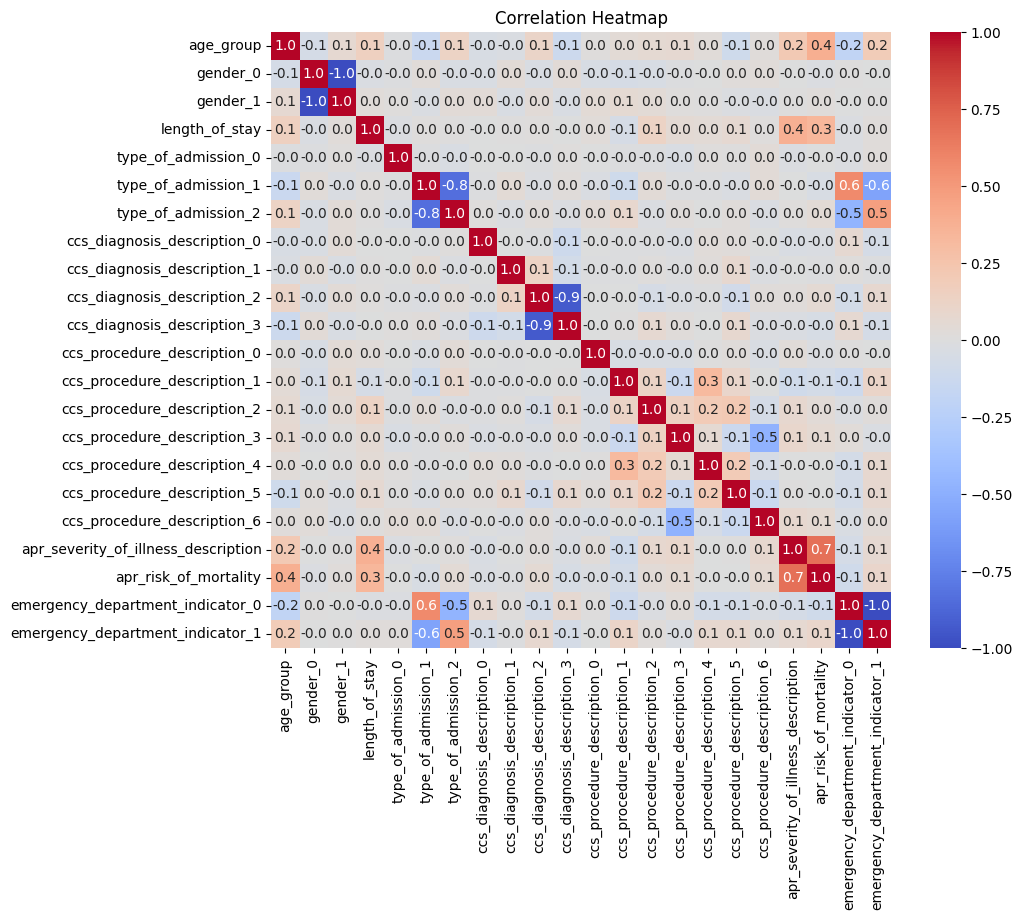

In [81]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df_v.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.01f')
plt.title('Correlation Heatmap')
plt.show()

* From the above there high correlaiton = -1 gender_1 & gender_0 we are going to drop gender_0.
* (type_of_admission_Emergency_1 &2) corr = -8 corr 0.6,0.5 & (emergency_department_indicator_1 corr = -1  with emergency_department_indicator_0) we are going to drop emergency_department_indicator_0 & 1 feature, & type_of_admission_2 .
* apr_risk_of_mortality & apr_severity_of_illness_description corr = 0.7 we are going to drop apr_risk_of_mortality
* ccs_diagnosis_description_2 * ccs_diagnosis_description_3 corr = -9 we are going to drop ccs_diagnosis_description_3


In [82]:
# dropping highly correlated feature ['birth_weight','emergency_department_indicator_Y','apr_risk_of_mortality']
df_v.drop(['gender_0','apr_risk_of_mortality','emergency_department_indicator_0','emergency_department_indicator_1','type_of_admission_2','ccs_diagnosis_description_3'],axis=1,inplace=True)

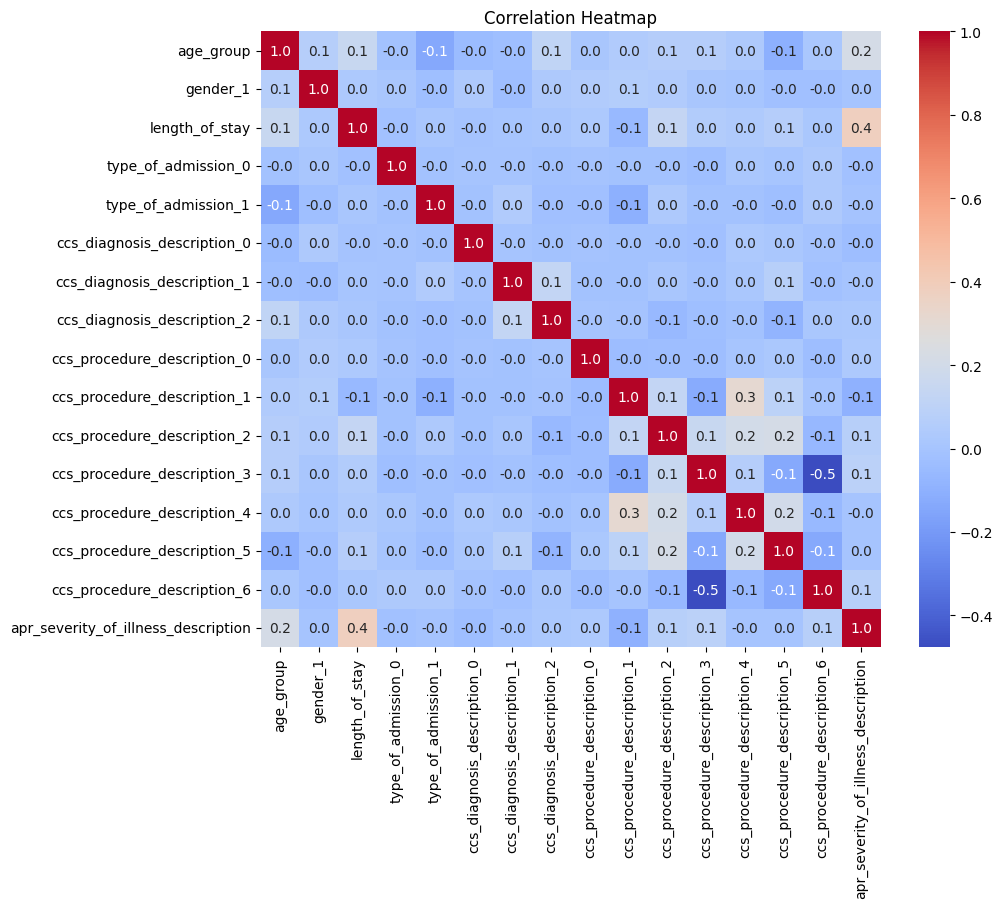

In [83]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df_v.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.01f')
plt.title('Correlation Heatmap')
plt.show()

In [84]:
#checking for duplication in data after feature encoded. 
df_v.duplicated().sum()

417

In [85]:
# Drop duplicates and reset the index
df_v = df_v.drop_duplicates().reset_index(drop=True)

In [86]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   age_group                            1439 non-null   int64
 1   gender_1                             1439 non-null   int64
 2   length_of_stay                       1439 non-null   int64
 3   type_of_admission_0                  1439 non-null   int64
 4   type_of_admission_1                  1439 non-null   int64
 5   ccs_diagnosis_description_0          1439 non-null   int64
 6   ccs_diagnosis_description_1          1439 non-null   int64
 7   ccs_diagnosis_description_2          1439 non-null   int64
 8   ccs_procedure_description_0          1439 non-null   int64
 9   ccs_procedure_description_1          1439 non-null   int64
 10  ccs_procedure_description_2          1439 non-null   int64
 11  ccs_procedure_description_3          1439 non-null   int

In [87]:
x = df_v.drop("length_of_stay", axis = 1)
y = df_v["length_of_stay"]

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [90]:
# trying different models to compare between them
models = {"Liner Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(n_neighbors=5),
          "RF": RandomForestRegressor()}

In [91]:
for name,model in models.items():
    print("----------- ", name, " -------------")
    model.fit(x_train_scaled,y_train)
    print('Train Score', model.score(x_train_scaled,y_train))
    print('Test Score', model.score(x_test_scaled,y_test))
    print("-"*60)

-----------  Liner Regression  -------------
Train Score 0.18400302564129245
Test Score 0.08597858177073381
------------------------------------------------------------
-----------  KNN  -------------
Train Score 0.3543970581955941
Test Score 0.0889493767489189
------------------------------------------------------------
-----------  RF  -------------
Train Score 0.5973589849207073
Test Score -0.06440693924149787
------------------------------------------------------------


In [93]:
# dealing with outiers by droping them
outliers_indices = detect_outliers(df_v, 0, df_v.columns)

In [94]:
len(outliers_indices)

807

In [96]:
df_v.drop(outliers_indices,inplace=True)

In [97]:
x = df_v.drop("length_of_stay", axis = 1)
y = df_v["length_of_stay"]

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [99]:
# trying different models to compare between them
models = {"Liner Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(n_neighbors=5),
          "RF": RandomForestRegressor()}

In [100]:
for name,model in models.items():
    print("----------- ", name, " -------------")
    model.fit(x_train,y_train)
    print('Train Score', model.score(x_train,y_train))
    print('Test Score', model.score(x_test,y_test))
    print("-"*60)

-----------  Liner Regression  -------------
Train Score 0.11830198412579906
Test Score 0.04949749221459565
------------------------------------------------------------
-----------  KNN  -------------
Train Score 0.20085327983305934
Test Score -0.16639339796490638
------------------------------------------------------------
-----------  RF  -------------
Train Score 0.31400728109949605
Test Score -0.22020829069016767
------------------------------------------------------------


In [101]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
print('Train Score', model.score(x_train,y_train))
print('Test Score', model.score(x_test,y_test))

Train Score 0.31400728109949605
Test Score -0.22020829069016767


In [102]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
print('Train Score', model.score(x_train,y_train))
print('Test Score', model.score(x_test,y_test))

Train Score 0.31400728109949605
Test Score -0.22020829069016767


C:\Users\hp\anaconda3\envs\diaapython\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [106]:
# checking if we drp younger age as they need special treatment 0-17 year
df_v.drop(df_v[df_v.age_group==1]['age_group'].index,axis=0,inplace=True)
df_v.age_group.value_counts()

5    139
4    132
3    119
2     87
Name: age_group, dtype: int64

In [107]:
x = df_v.drop("length_of_stay", axis = 1)
y = df_v["length_of_stay"]

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
# trying different models to compare between them
models = {"Liner Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(n_neighbors=5),
          "RF": RandomForestRegressor()}

In [110]:
for name,model in models.items():
    print("----------- ", name, " -------------")
    model.fit(x_train,y_train)
    print('Train Score', model.score(x_train,y_train))
    print('Test Score', model.score(x_test,y_test))
    print("-"*60)

-----------  Liner Regression  -------------
Train Score 0.12368732884385014
Test Score 0.11176805138967771
------------------------------------------------------------
-----------  KNN  -------------
Train Score 0.21169177188811417
Test Score -0.18470245199498447
------------------------------------------------------------
-----------  RF  -------------
Train Score 0.33352318491247546
Test Score -0.23163289707021506
------------------------------------------------------------


In [111]:
data.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,0 to 17,F,3,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
1,70 or Older,M,1,Emergency,246,Fever of unknown origin,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical,N
2,0 to 17,M,2,Emergency,224,Other perinatal conditions,0,NO PROC,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
3,0 to 17,M,3,Emergency,246,Fever of unknown origin,4,DIAGNOSTIC SPINAL TAP,722,Fever,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
4,0 to 17,M,1,Urgent,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,N


In [112]:
data[data['apr_drg_description']=='Viral illness']['ccs_procedure_description'].nunique()

76

In [120]:
df = data[(data['apr_drg_description']=='Viral illness') & (data['ccs_procedure_description']=='NO PROC')].copy()

In [121]:
df

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,0 to 17,F,3,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
4,0 to 17,M,1,Urgent,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,N
8,0 to 17,F,2,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",1,Minor,Minor,Medical,Y
9,50 to 69,F,3,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",3,Major,Minor,Medical,Y
11,50 to 69,F,2,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Minor,Medical,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48303,18 to 29,M,6,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",3,Major,Moderate,Medical,Y
48355,70 or Older,F,5,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Major,Medical,N
48364,0 to 17,M,10,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",3,Major,Minor,Medical,Y
48426,70 or Older,F,3,Emergency,7,Viral infection,0,NO PROC,723,Viral illness,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Major,Medical,Y


In [122]:
df.nunique()

age_group                               5
gender                                  2
length_of_stay                         22
type_of_admission                       5
ccs_diagnosis_code                      5
ccs_diagnosis_description               5
ccs_procedure_code                      1
ccs_procedure_description               1
apr_drg_code                            1
apr_drg_description                     1
apr_mdc_code                            1
apr_mdc_description                     1
apr_severity_of_illness_code            4
apr_severity_of_illness_description     4
apr_risk_of_mortality                   4
apr_medical_surgical_description        1
emergency_department_indicator          2
dtype: int64

In [124]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('*'*100)

age_group
70 or Older    156
0 to 17        141
50 to 69       134
30 to 49        95
18 to 29        80
Name: age_group, dtype: int64
****************************************************************************************************
gender
F    310
M    296
Name: gender, dtype: int64
****************************************************************************************************
length_of_stay
2     122
3     113
1      96
4      71
5      58
6      45
7      31
8      23
9      14
10      6
11      6
13      4
12      4
15      3
14      2
18      2
44      1
25      1
16      1
23      1
42      1
19      1
Name: length_of_stay, dtype: int64
****************************************************************************************************
type_of_admission
Emergency        519
Urgent            60
Elective          25
Newborn            1
Not Available      1
Name: type_of_admission, dtype: int64
*******************************************************************************

In [92]:
# saving data frame in csv file in processed folder for the modeling step.
# df.to_csv('../data/processed/processed_data.csv',index=False)

## **Preprocessing Outcomes Summary:**

The main objective of preprocessing and outcomes as follows:

1. Checking the dataset for irrelevant columns that do not serve our prediction model of length of stay and dealing with them.
    - Not all the features serve our aim, as we attempt to create a general model that can predict patient length of stay regardless of the city or state. Additionally, 'total_cost' and 'charges' exceeding 120 days of stay do not make sense to keep. The following columns were removed: ('health_service_area', 'hospital_county', 'operating_certificate_number', 'facility_id', 'facility_name', 'race','ethnicity','zip_code__3_digits', 'patient_disposition', 'payment_typology_1', 'total_charges', 'total_costs', 'over_120_stay').
---   
2. Handling Categorical Variables:
    - First, encoding ordinal features.
    - Second, encoding nominal features:
        1. For features with high cardinality, we used Target Encoding (Mean Encoding) and then dropped them:
            - (ccs_diagnosis_description: 263 unique, ccs_procedure_description: 232, apr_drg_description: 314, apr_mdc_description: 25 unique values).
        2. For features with low cardinality, we used get_dummies to encode them:
            - (gender: 2 unique, type_of_admission: 6, apr_medical_surgical_description: 2, emergency_department_indicator: 2).
---
3. Checking correlation matrices for the target length of stay after encoding the features. The results were as follows:

               - length_of_stay                               1.00
               - apr_drg_description                          0.54
               - ccs_procedure_description                    0.39
               - ccs_diagnosis_description                    0.36
               - apr_severity_of_illness_description          0.35
               - apr_risk_of_mortality                        0.30
               - apr_mdc_description                          0.28
               - age_group                                    0.11
               - type_of_admission_Emergency                  0.07
               - gender_M                                     0.05
               - emergency_department_indicator_Y             0.05
               - apr_medical_surgical_description_Surgical    0.03
               - ethnicity_Not Span/Hispanic                  0.03
               - type_of_admission_Urgent                     0.02
               - type_of_admission_Trauma                     0.01
               - race_Multi-racial                            0.00
               - type_of_admission_Not Available              0.00
               - ethnicity_Unknown                           -0.01
               - race_White                                  -0.01
               - race_Other Race                             -0.02
               - ethnicity_Spanish/Hispanic                  -0.03
               - birth_weight                                -0.06
               - type_of_admission_Newborn                   -0.07


* From the above correlation matrix with length of stay, we noticed that some nominal features had added weight in relation to our target, especially after using the Target Encoding (Mean Encoding) method as described above.
* From the correlation heatmap there high correlaiton = 1 between birth_weight & type_of_admission_Newborn we drop birth weight feature.
* type_of_admission_Emergency & emergency_department_indicator_Y with corr = 0.8 we  drop emergency_department_indicator_Y feature.
* apr_severity_of_illness_description & apr_risk_of_mortality corr = 0.8 we drop apr_risk_of_mortality.
* ccs_diagnosis_description have 0.6 and 0.7  positive correlanialty with apr_drg_description, apr_mdc_description respectively we are going to drop apr_drg_description, apr_mdc_description.
---
4. Saving a dictionary for categorical features that will be needed in the model deployment step.
---
5. After checking for duplication after all of the above process we found 2138069 duplicated value. we drop all of it and rest the index.
---
5. Saving the preprocessed, encoded, and scaled CSV file for the next modeling step.
